# Timeseries along the thalweg : Victoria Sill - Saanich Inlet (v202111b)

In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean.cm as cm
import copy

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

import datetime as dt
import arrow
import copy
import math
import matplotlib.dates as mdates
import gsw

In [2]:
df_gridT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_grid_T.nc')
df_prodT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_prod_T.nc')
df_chemT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_chem_T.nc')
df_biolT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_biol_T.nc')

thalweg_file = '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt'

In [3]:
mesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')

meshb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')

depthb = meshb.variables['gdept_0'][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)


In [4]:
df_prodT.PPDIAT.shape

(21, 40, 898, 398)

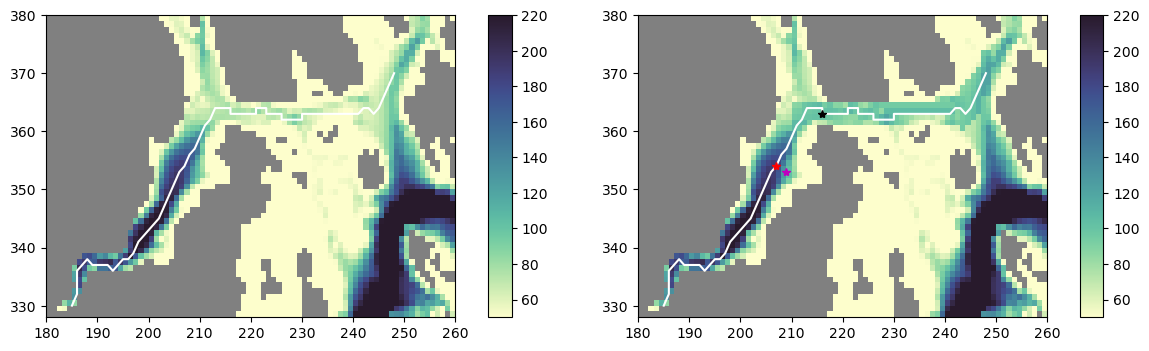

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathy.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[0].plot(thalweg_pts[:,1],thalweg_pts[:,0],color='w')
im2 = ax[1].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg_pts[:,1],thalweg_pts[:,0],color='w')
ax[1].plot(216, 363, '*k')
ax[1].plot(207, 354, '*r')
ax[1].plot(207+2, 354-1, '*m') # Patricia Bay (VENUS Instrument Plateform, CTDA and Oxygen rinko sensors)
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
ax[0].set_xlim([180, 260])
ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')

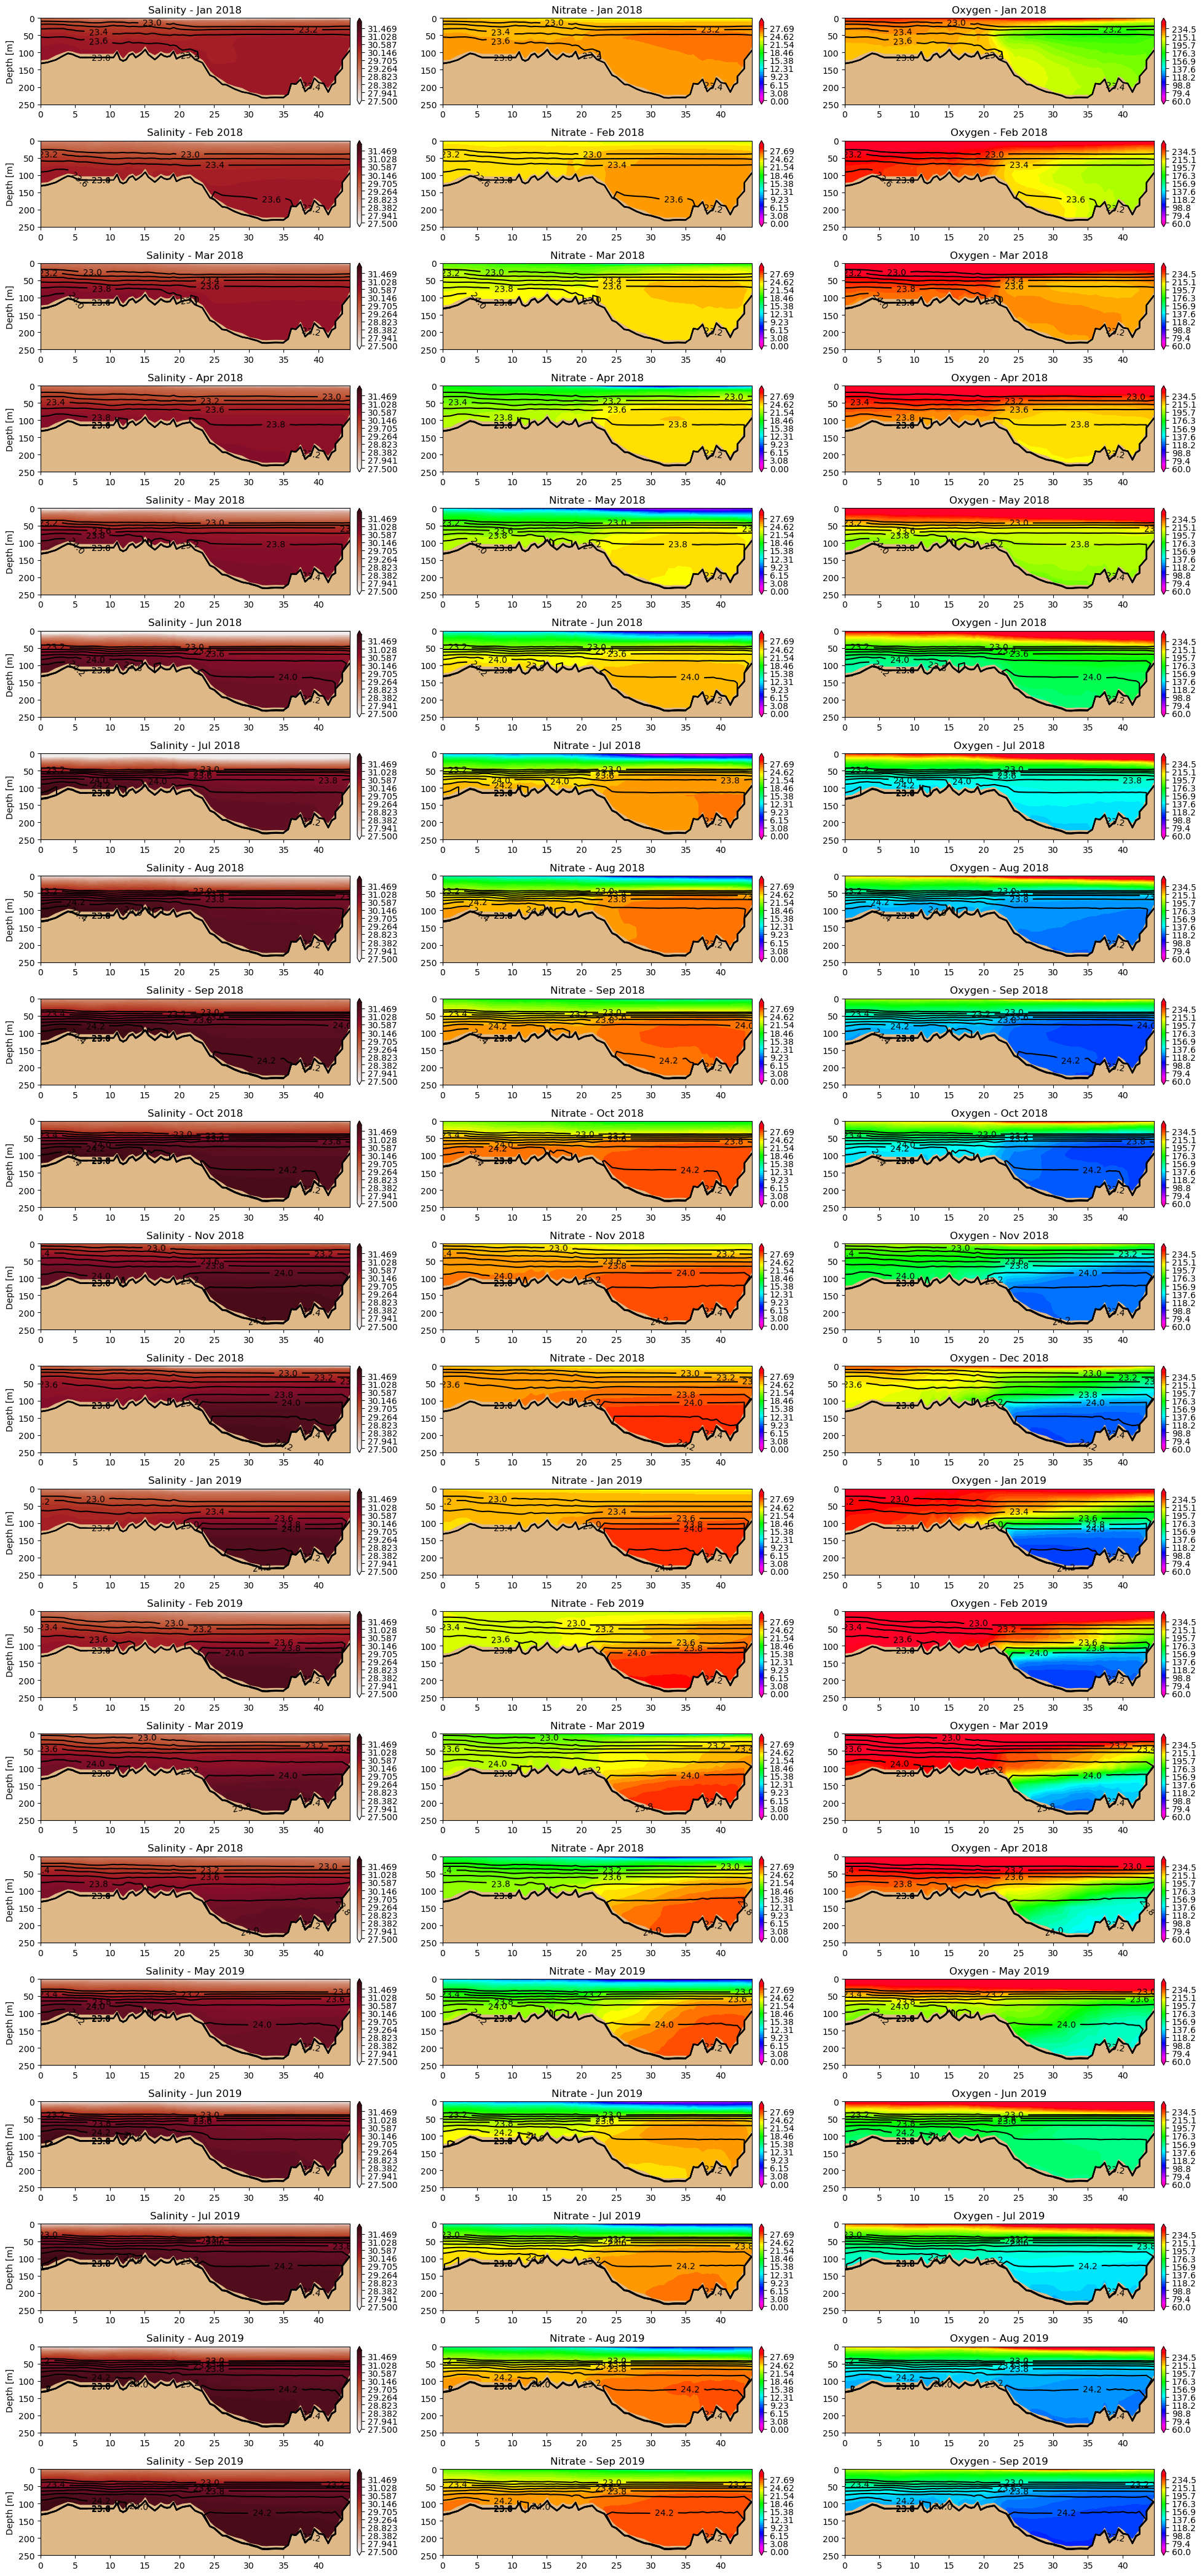

In [6]:
fig, axs = plt.subplots(21, 3, figsize=(20, 3.5*12))
lp, cpsal, cpnit, cpoxy = 0, 0, 1, 2
Month = list(['Dec 2017',
        'Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018','Dec 2018',
        'Jan 2019','Feb 2019','Mar 2019','Apr 2018','May 2019','Jun 2019','Jul 2019','Aug 2019','Sep 2019','Oct 2019','Nov 2019','Dec 2019'])
for month in range(1, 21+1):
    dep_thal, distance, sal_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_gridT.vosaline[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, den_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_gridT.sigma_theta[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, nit_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.nitrate[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, dia_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.diatoms[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, fla_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.flagellates[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, oxy_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemT.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    sal_plot = vis._fill_in_bathy(sal_thal, meshb, thalweg_pts)
    den_plot = vis._fill_in_bathy(den_thal, meshb, thalweg_pts)
    nit_plot = vis._fill_in_bathy(nit_thal, meshb, thalweg_pts)
    dia_plot = vis._fill_in_bathy(dia_thal, meshb, thalweg_pts)
    fla_plot = vis._fill_in_bathy(fla_thal, meshb, thalweg_pts)
    oxy_plot = vis._fill_in_bathy(oxy_thal, meshb, thalweg_pts)
    colours_sal = axs[lp,cpsal].contourf(distance, dep_thal, sal_plot, np.linspace(27.5, 31.8, 40), 
                                     cmap=cm.amp, extend='both')
    colours_nit = axs[lp,cpnit].contourf(distance, dep_thal, nit_plot, np.linspace(0, 30, 40), 
                                     cmap='gist_rainbow_r', extend='both')
    colours_oxy = axs[lp,cpoxy].contourf(distance, dep_thal, oxy_plot, np.linspace(60, 250, 50),                                     
    #        [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120,
    #        125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185,
    #        190, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
    #        260, 265, 270, 275, 280, 285, 290, 295, 300],
                                    cmap='gist_rainbow_r', extend='both')
    CdenSal = axs[lp,cpsal].contour(distance, dep_thal, den_plot, np.arange(23., 27, 0.2),
                                     colors='k', extend='both')
    CdenNit = axs[lp,cpnit].contour(distance, dep_thal, den_plot, np.arange(23, 27, 0.2),
                                     colors='k', extend='both')
    CdenOxy = axs[lp,cpoxy].contour(distance, dep_thal,  den_plot, np.arange(23, 27, 0.2),
                                     colors='k', extend='both')
    axs[lp,cpsal].clabel(CdenSal, inline=True, fontsize=10)
    axs[lp,cpnit].clabel(CdenNit, inline=True, fontsize=10)
    axs[lp,cpoxy].clabel(CdenOxy, inline=True, fontsize=10)
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpsal], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpnit], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpoxy], color='burlywood')
    axs[lp,cpsal].invert_yaxis()
    axs[lp,cpnit].invert_yaxis()
    axs[lp,cpoxy].invert_yaxis()
    axs[lp,cpsal].set_ylim(250, 0)
    axs[lp,cpnit].set_ylim(250, 0)
    axs[lp,cpoxy].set_ylim(250, 0)
    axs[lp,cpsal].set_ylabel('Depth [m]');
    axs[lp,cpsal].set_title(f'Salinity - {Month[month]}')
    axs[lp,cpnit].set_title(f'Nitrate - {Month[month]}')
    axs[lp,cpoxy].set_title(f'Oxygen - {Month[month]}')
    cbar = fig.colorbar(colours_sal, ax=axs[lp,cpsal], pad=0.02)
    cbar = fig.colorbar(colours_nit, ax=axs[lp,cpnit], pad=0.02)
    cbar = fig.colorbar(colours_oxy, ax=axs[lp,cpoxy], pad=0.02)
    lp = lp + 1;
#fig.suptitle('Year 2018 - v202111b - Victoria Sill - Saanich Inlet');
fig.tight_layout();

# Can we see the water nenew in 2018-2019 ?

In [6]:
# ONC observation
df_ctd = pd.read_csv('/ocean/atall/MOAD/Obs/ONC/Saanich_Inlet/Patricia_Bay/SI_Venus_Inst_Platform/Temperature_SA_Sigmat_CTDA_20180101_20191231_clean_avg1day_edit.csv')
df_rko = pd.read_csv('/ocean/atall/MOAD/Obs/ONC/Saanich_Inlet/Patricia_Bay/SI_Venus_Inst_Platform/Temperature_Oxygen_RinkoSensor_20180101_20191231_clean_avg1day_edit.csv')
df_ctd.head()

Time UTC (yyyy-mm-ddThh:mm:ss.fffZ) Temperature (C)  \
0            2018-01-01T12:00:00.000Z     9.585932539   
1            2018-01-02T12:00:00.000Z     9.577705381   
2            2018-01-03T12:00:00.000Z     9.581542369   
3            2018-01-04T12:00:00.000Z     9.578901597   
4            2018-01-05T12:00:00.000Z     9.577732847   

  Practical Salinity (psu) Sigma-t (kg/m3)  
0             30.963502805     23.86826656  
1             30.934944818    23.847273839  
2             30.946245712    23.855487199  
3             30.931631389    23.844496877  
4             30.924635069    23.839219606

In [7]:
df_rko.head()

Time UTC (yyyy-mm-ddThh:mm:ss.fffZ) Temperature (C)  \
0            2018-01-01T12:00:00.000Z     9.600959017   
1            2018-01-02T12:00:00.000Z     9.593706987   
2            2018-01-03T12:00:00.000Z     9.595493833   
3            2018-01-04T12:00:00.000Z     9.594484038   
4            2018-01-05T12:00:00.000Z     9.594025563   

  Oxygen Concentration Corrected (ml/l)  
0                           0.507372272  
1                           0.634645594  
2                           0.566978259  
3                           0.608590795  
4                           0.615223959

In [8]:
# Convert objet dataframe to int
df_rko['Oxygen Concentration Corrected (ml/l)'] = pd.to_numeric(df_rko['Oxygen Concentration Corrected (ml/l)'], errors='coerce')
df_rko['Temperature (C)'] = pd.to_numeric(df_rko['Temperature (C)'], errors='coerce')
df_ctd['Temperature (C)'] = pd.to_numeric(df_ctd['Temperature (C)'], errors='coerce')
df_ctd['Practical Salinity (psu)'] = pd.to_numeric(df_ctd['Practical Salinity (psu)'], errors='coerce')
df_ctd['Sigma-t (kg/m3)'] = pd.to_numeric(df_ctd['Sigma-t (kg/m3)'], errors='coerce')
time = np.arange(dt.datetime(2018,1,1), dt.datetime(2019,12,31), dt.timedelta(days=1)).astype(dt.datetime)

In [9]:
# Obs variables
oxy_obs = df_rko['Oxygen Concentration Corrected (ml/l)']
sal_obs = gsw.SR_from_SP(df_ctd['Practical Salinity (psu)']) # from practical to ref salinity (g/kg)
tem_obs = df_ctd['Temperature (C)']
tem_obs2 = df_rko['Temperature (C)']
sig_obs = df_ctd['Sigma-t (kg/m3)']

In [10]:
# SalishSeaCast model time series (202310b bathymetry)
df_gridTd = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201*_grid_T.nc')
df_prodTd = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201*_prod_T.nc')
df_chemTd = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201*_chem_T.nc')
df_biolTd = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201*_biol_T.nc')

In [11]:
meshmask = xr.open_dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
tmask = meshmask.tmask
#tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
mbathy = meshmask.mbathy
tmask


<xarray.DataArray 'tmask' (t: 1, z: 40, y: 898, x: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: t, z, y, x

In [12]:
df_gridTd.vosaline.shape

(638, 40, 898, 398)

In [13]:
jsill, isill, jsaai, isaai = 363, 216, 354, 207

In [14]:
print(bathyb.variables['Bathymetry'][jsill, isill], bathyb.variables['Bathymetry'][jsaai, isaai], bathyb.variables['Bathymetry'][jsaai-1, isaai+2])

102.4375 181.125 103.875


In [15]:
# Obs cordonates : 48.651366°N, -123.486358°W, 93m
print(np.array(df_chemTd.nav_lat[jsaai-1, isaai+2]),np.array(df_chemTd.nav_lon[jsaai-1, isaai+2]), bathyb.variables['Bathymetry'][jsaai-1, isaai+2])

48.652397 -123.48762 103.875


Text(0.5, 1.0, 'Temperature')

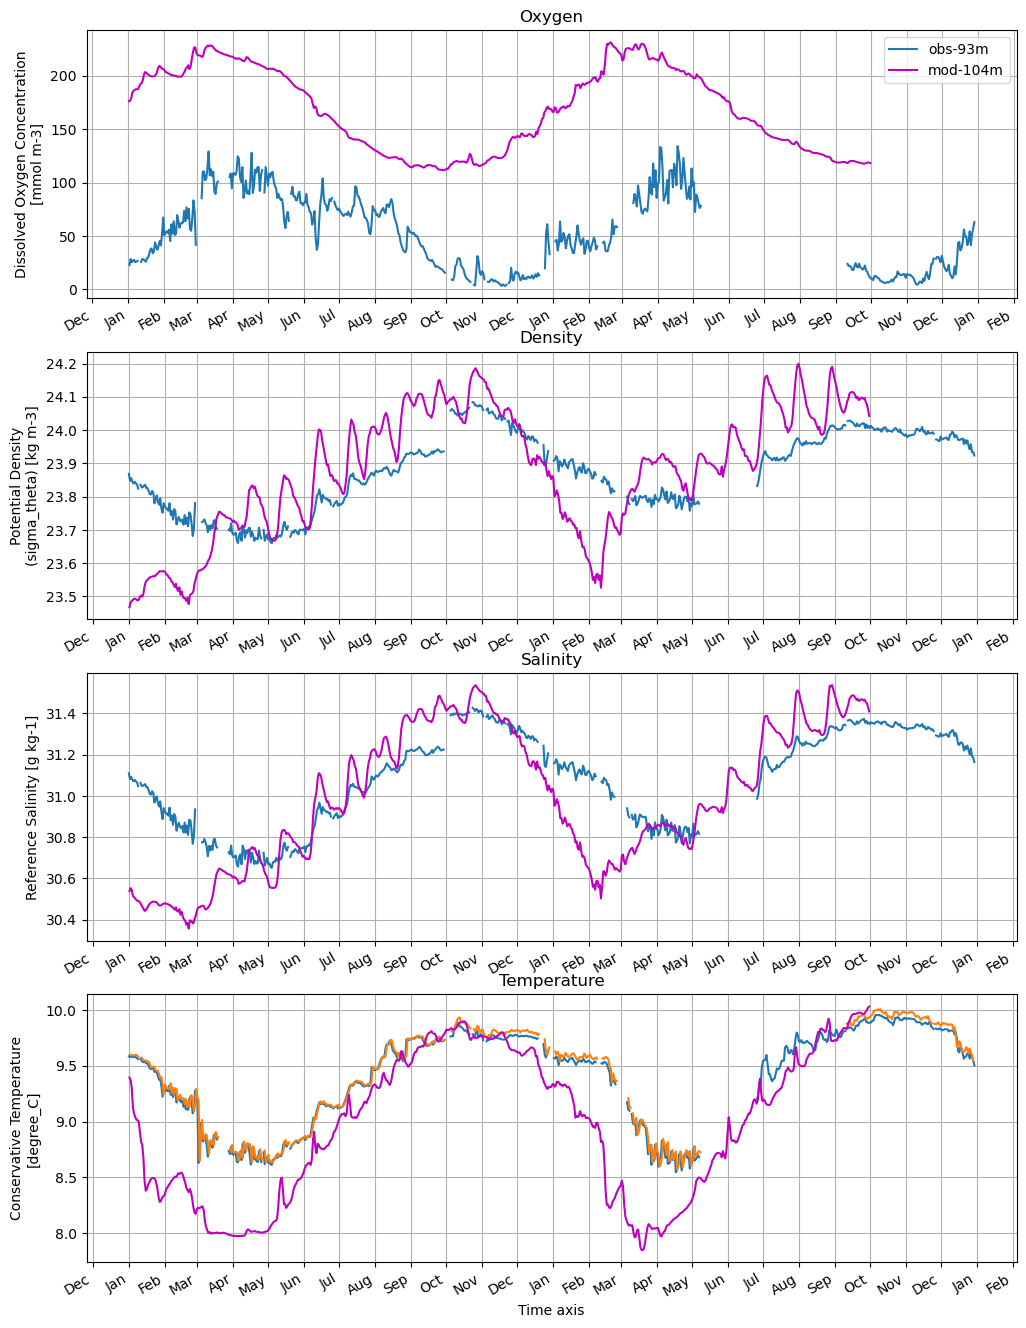

In [121]:
fig, axs = plt.subplots(4, 1, figsize=(12, 16))
axs[0].plot(time[1:728],oxy_obs * 44.661, label='obs-93m')
df_chemTd['dissolved_oxygen'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[0], x="time_counter", color='m',label='mod-104m')
axs[0].legend()
axs[1].plot(time, sig_obs)
df_gridTd['sigma_theta'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[1], x="time_counter", color='m')

axs[2].plot(time, sal_obs)
df_gridTd['vosaline'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[2], x="time_counter", color='m')

axs[3].plot(time, tem_obs)
axs[3].plot(time[1:728], tem_obs2)
df_gridTd['votemper'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[3], x="time_counter", color='m')

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()
# Make ticks on occurrences of each month:
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[2].xaxis.set_major_locator(mdates.MonthLocator())
axs[3].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axs[0].set_title('Oxygen')
axs[1].set_title('Density')
axs[2].set_title('Salinity')
axs[3].set_title('Temperature')

Text(0.5, 1.0, 'Nitrate')

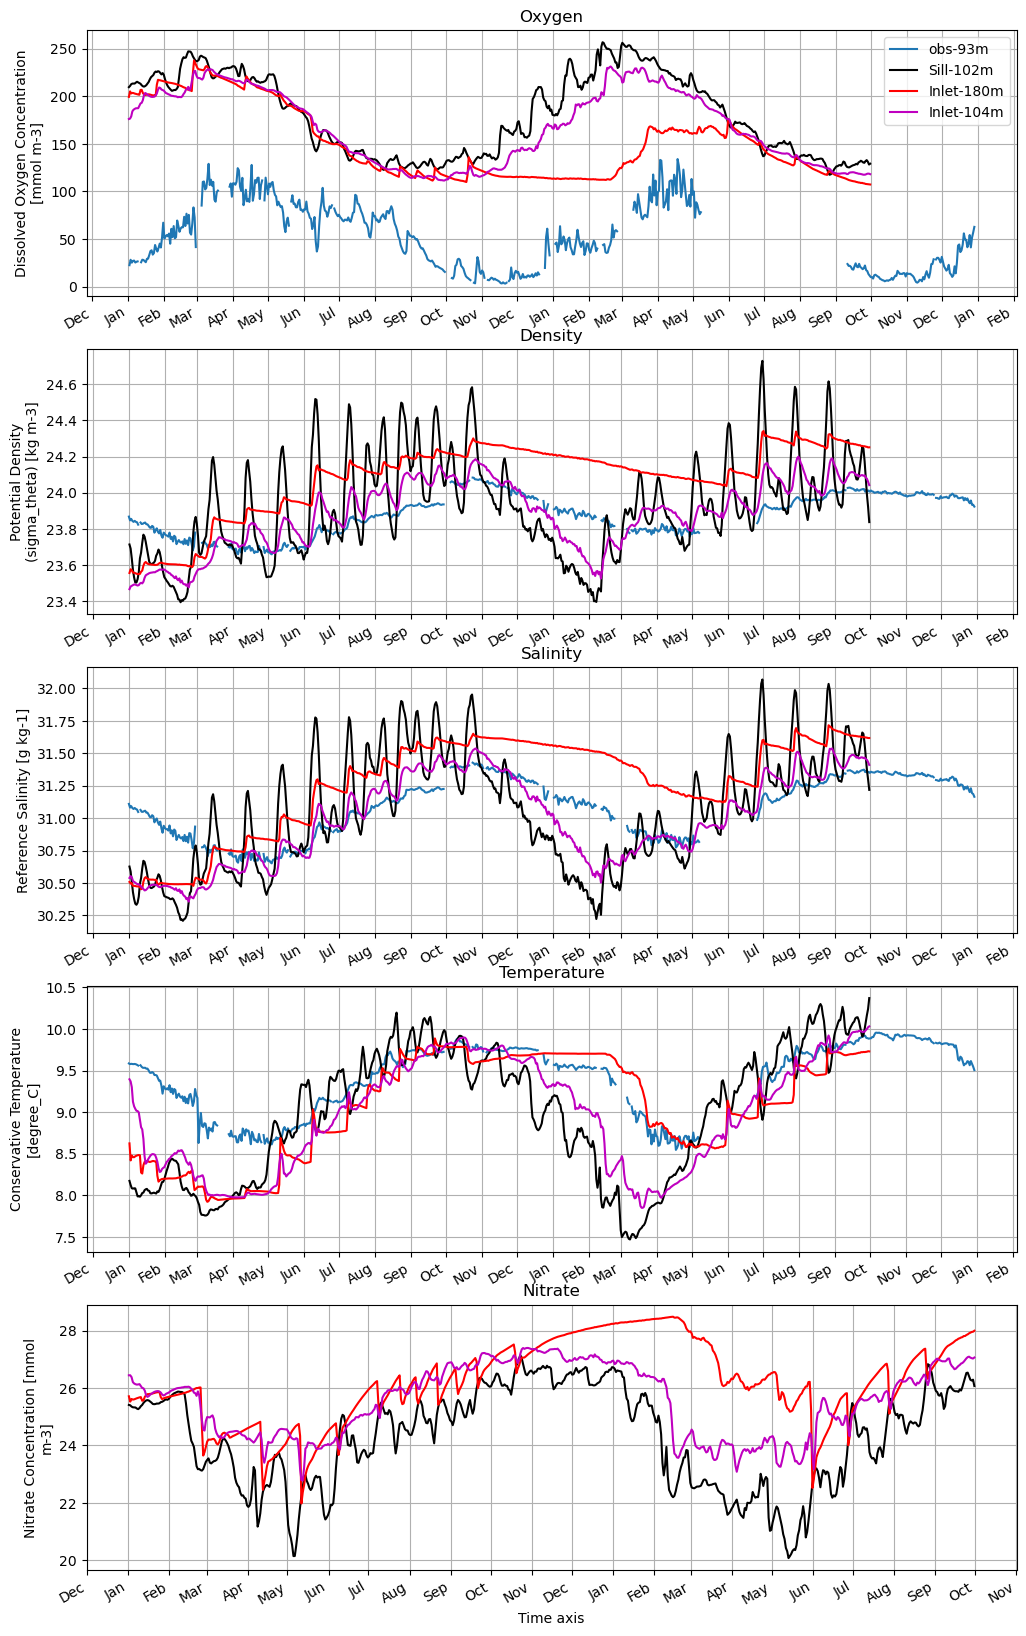

In [16]:
fig, axs = plt.subplots(5, 1, figsize=(12, 20))
axs[0].plot(time[1:728],oxy_obs * 44.661, label='obs-93m')
df_chemTd['dissolved_oxygen'][:, mbathy[0, jsill, isill]-1, jsill, isill].where(tmask[0, mbathy[0, jsill, isill]-1, jsill, isill] == 1).plot(ax=axs[0], x="time_counter", color='k',label='Sill-102m')
df_chemTd['dissolved_oxygen'][:, mbathy[0, jsaai, isaai]-1, jsaai, isaai].where(tmask[0, mbathy[0, jsaai, isaai]-1, jsaai, isaai] == 1).plot(ax=axs[0], x="time_counter", color='r',label='Inlet-180m')
df_chemTd['dissolved_oxygen'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[0], x="time_counter", color='m',label='Inlet-104m')
axs[0].legend()
axs[1].plot(time, sig_obs)
df_gridTd['sigma_theta'][:, mbathy[0, jsill, isill]-1, jsill, isill].where(tmask[0, mbathy[0, jsill, isill]-1, jsill, isill] == 1).plot(ax=axs[1], x="time_counter", color='k')
df_gridTd['sigma_theta'][:, mbathy[0, jsaai, isaai]-1, jsaai, isaai].where(tmask[0, mbathy[0, jsaai, isaai]-1, jsaai, isaai] == 1).plot(ax=axs[1], x="time_counter", color='r')
df_gridTd['sigma_theta'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[1], x="time_counter", color='m')
axs[2].plot(time, sal_obs)
df_gridTd['vosaline'][:, mbathy[0, jsill, isill]-1, jsill, isill].where(tmask[0, mbathy[0, jsill, isill]-1, jsill, isill] == 1).plot(ax=axs[2], x="time_counter", color='k')
df_gridTd['vosaline'][:, mbathy[0, jsaai, isaai]-1, jsaai, isaai].where(tmask[0, mbathy[0, jsaai, isaai]-1, jsaai, isaai] == 1).plot(ax=axs[2], x="time_counter", color='r')
df_gridTd['vosaline'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[2], x="time_counter", color='m')
axs[3].plot(time, tem_obs)
df_gridTd['votemper'][:, mbathy[0, jsill, isill]-1, jsill, isill].where(tmask[0, mbathy[0, jsill, isill]-1, jsill, isill] == 1).plot(ax=axs[3], x="time_counter", color='k')
df_gridTd['votemper'][:, mbathy[0, jsaai, isaai]-1, jsaai, isaai].where(tmask[0, mbathy[0, jsaai, isaai]-1, jsaai, isaai] == 1).plot(ax=axs[3], x="time_counter", color='r')
df_gridTd['votemper'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[3], x="time_counter", color='m')
df_biolTd['nitrate'][:, mbathy[0, jsill, isill]-1, jsill, isill].where(tmask[0, mbathy[0, jsill, isill]-1, jsill, isill] == 1).plot(ax=axs[4], x="time_counter", color='k')
df_biolTd['nitrate'][:, mbathy[0, jsaai, isaai]-1, jsaai, isaai].where(tmask[0, mbathy[0, jsaai, isaai]-1, jsaai, isaai] == 1).plot(ax=axs[4], x="time_counter", color='r')
df_biolTd['nitrate'][:, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2].where(tmask[0, mbathy[0, jsaai-1, isaai+2]-1, jsaai-1, isaai+2] == 1).plot(ax=axs[4], x="time_counter", color='m')

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('')

axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()
axs[4].grid()
# Make ticks on occurrences of each month:
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[2].xaxis.set_major_locator(mdates.MonthLocator())
axs[3].xaxis.set_major_locator(mdates.MonthLocator())
axs[4].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axs[0].set_title('Oxygen')
axs[1].set_title('Density')
axs[2].set_title('Salinity')
axs[3].set_title('Temperature')
axs[4].set_title('Nitrate')



# What about the biology : chlorophyll and primary production ?

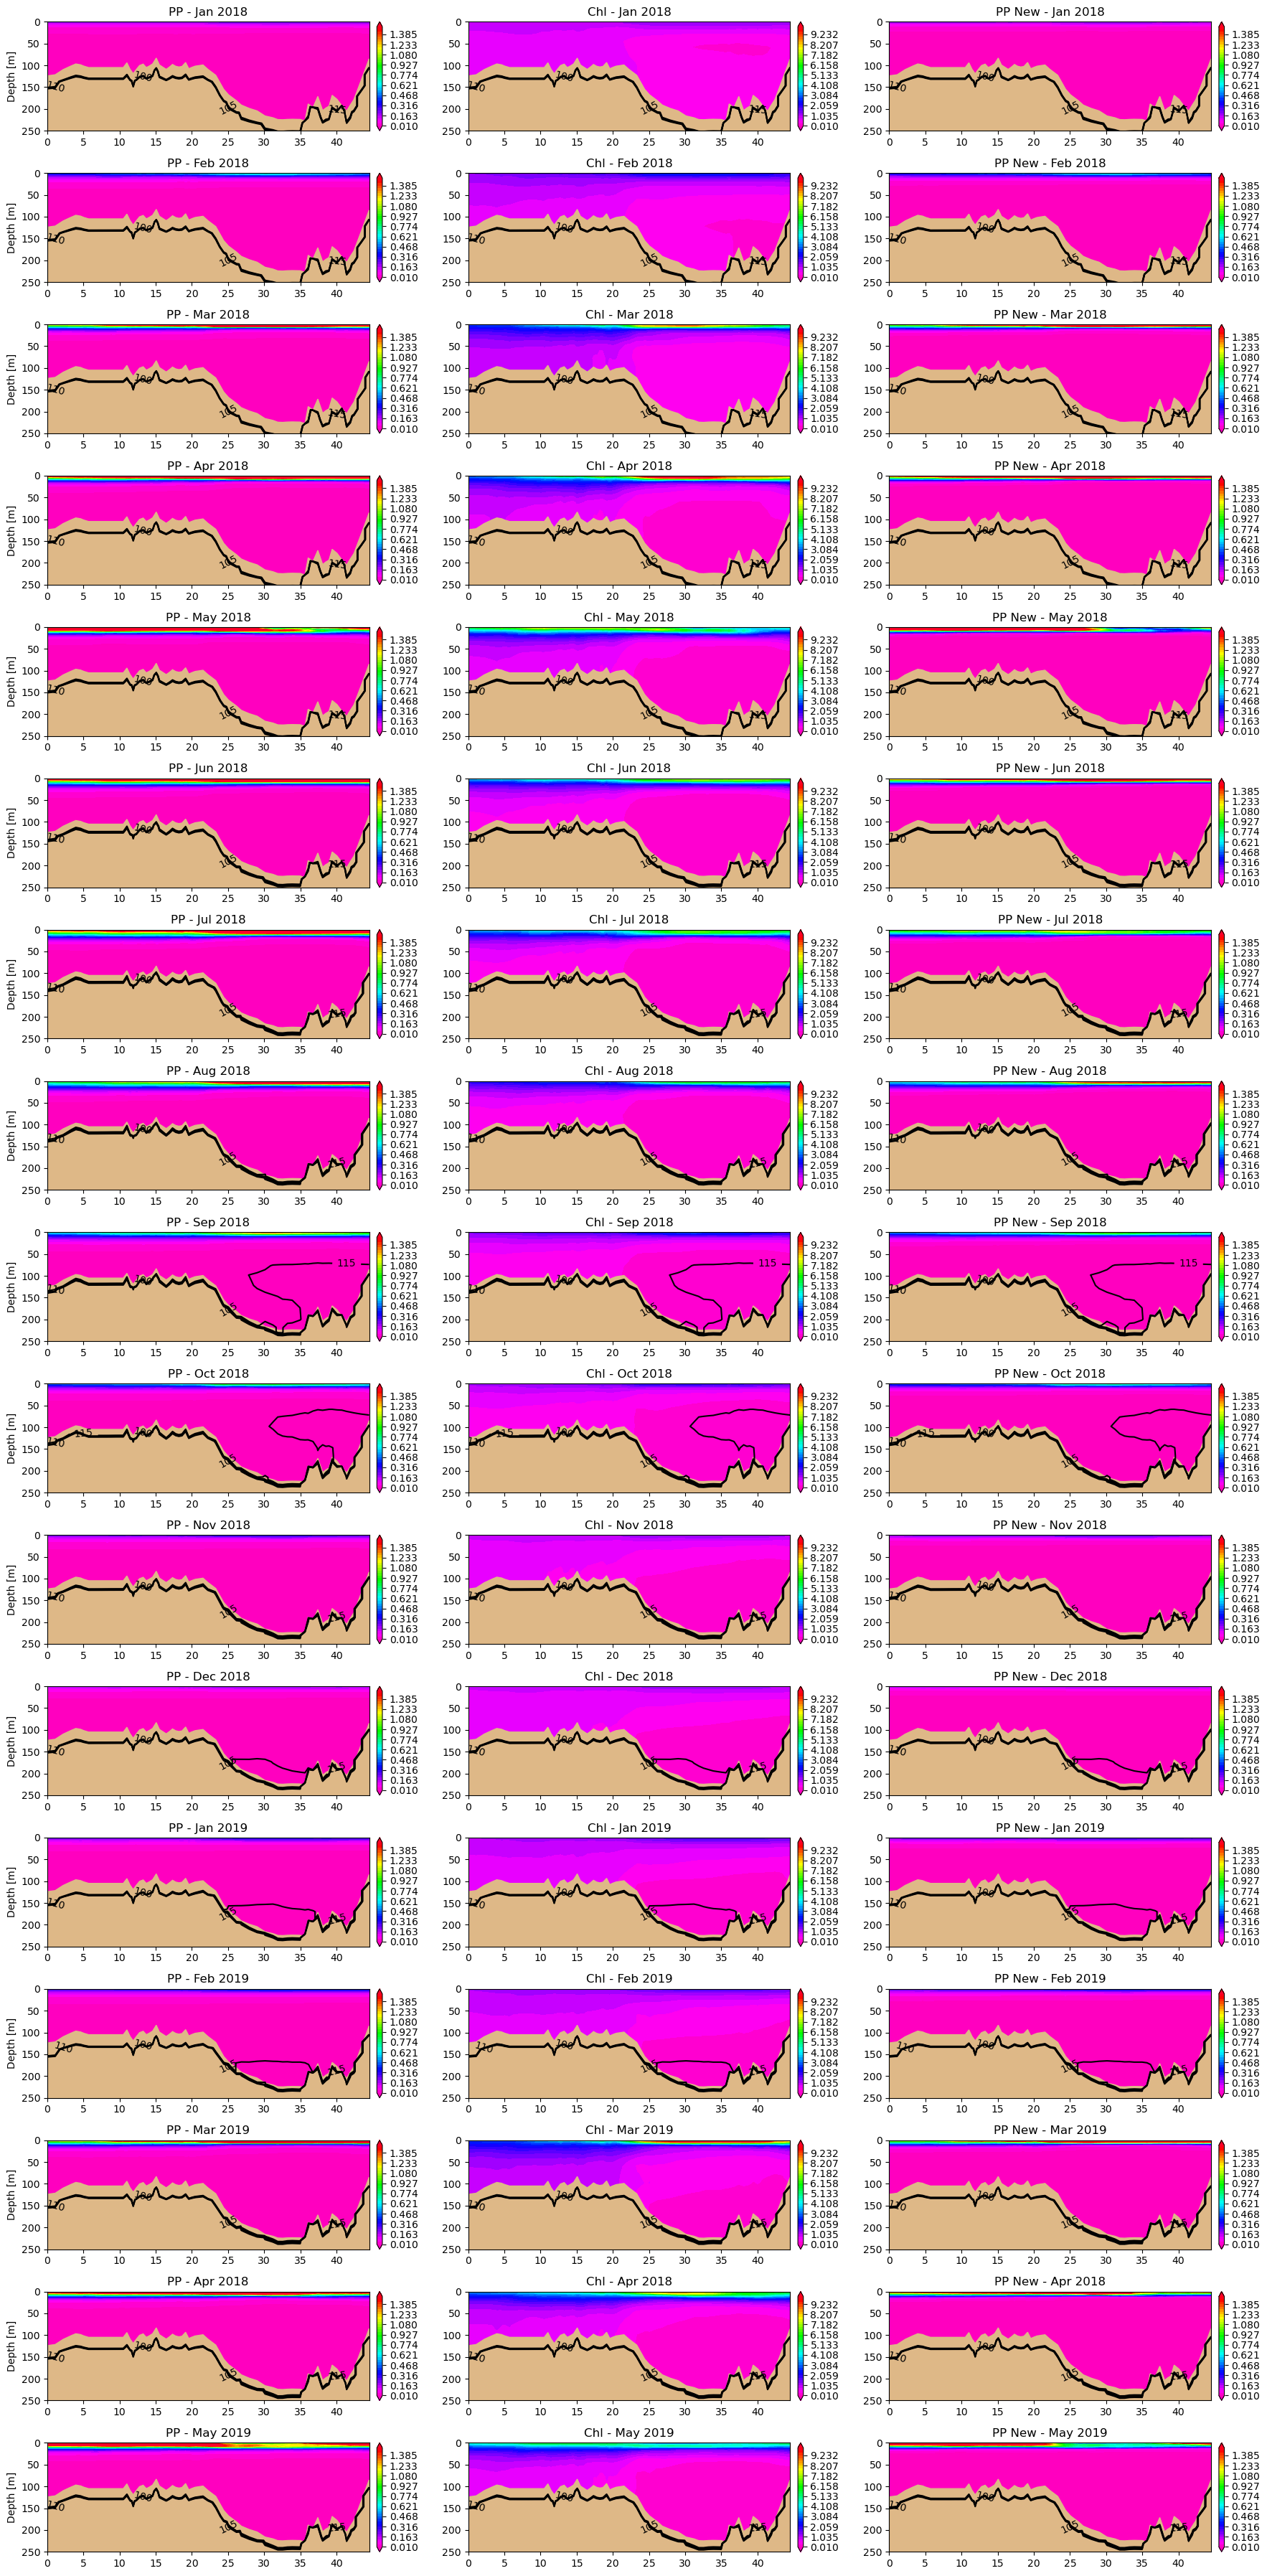

In [ ]:
from matplotlib import ticker
fig, axs = plt.subplots(17, 3, figsize=(18, 3*12))
lp, cpsal, cpnit, cpoxy = 0, 0, 1, 2
for month in range(1, 17+1):
    dep_thal, distance, DIA_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_prodT.PPDIAT[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, PHY_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_prodT.PPPHY[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, DIAN_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_prodT.PPDIATNO3[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, PHYN_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_prodT.PPPHYNO3[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, nit_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.nitrate[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, dia_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.diatoms[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, fla_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.flagellates[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, oxy_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemT.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    DIA_plot = vis._fill_in_bathy(DIA_thal, meshb, thalweg_pts)
    PHY_plot = vis._fill_in_bathy(PHY_thal, meshb, thalweg_pts)
    DIAN_plot = vis._fill_in_bathy(DIAN_thal, meshb, thalweg_pts)
    PHYN_plot = vis._fill_in_bathy(PHYN_thal, meshb, thalweg_pts)
    nit_plot = vis._fill_in_bathy(nit_thal, meshb, thalweg_pts)
    dia_plot = vis._fill_in_bathy(dia_thal, meshb, thalweg_pts)
    fla_plot = vis._fill_in_bathy(fla_thal, meshb, thalweg_pts)
    oxy_plot = vis._fill_in_bathy(oxy_thal, meshb, thalweg_pts)
    colours_PP = axs[lp,cpsal].contourf(distance, dep_thal, (DIA_plot + PHY_plot)*86400, np.linspace(0.01, 1.5, 40),
                                     cmap='gist_rainbow_r', extend='both')
    colours_chl = axs[lp,cpnit].contourf(distance, dep_thal, (dia_plot + fla_plot)*2, np.linspace(0.01, 10, 40),
                                     cmap='gist_rainbow_r', extend='both')
    colours_PPN = axs[lp,cpoxy].contourf(distance, dep_thal, (DIAN_plot + PHYN_plot)*86400, np.linspace(0.01, 1.5, 40),                        
                                    cmap='gist_rainbow_r', extend='both')
    CoxyPP = axs[lp,cpsal].contour(distance, dep_thal, oxy_plot, np.arange(100, 120, 5),
                                     colors='k', extend='both')
    Coxychl = axs[lp,cpnit].contour(distance, dep_thal, oxy_plot, np.arange(100, 120, 5),
                                     colors='k', extend='both')
    CoxyPPN = axs[lp,cpoxy].contour(distance, dep_thal,  oxy_plot, np.arange(100, 120, 5),
                                     colors='k', extend='both')
    axs[lp,cpsal].clabel(CoxyPP, inline=True, fontsize=10)
    axs[lp,cpnit].clabel(Coxychl, inline=True, fontsize=10)
    axs[lp,cpoxy].clabel(CoxyPPN, inline=True, fontsize=10)
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpsal], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpnit], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpoxy], color='burlywood')
    axs[lp,cpsal].invert_yaxis()
    axs[lp,cpnit].invert_yaxis()
    axs[lp,cpoxy].invert_yaxis()
    axs[lp,cpsal].set_ylim(250, 0)
    axs[lp,cpnit].set_ylim(250, 0)
    axs[lp,cpoxy].set_ylim(250, 0)
    axs[lp,cpsal].set_ylabel('Depth [m]');
    axs[lp,cpsal].set_title(f'PP - {Month[month]}')
    axs[lp,cpnit].set_title(f'Chl - {Month[month]}')
    axs[lp,cpoxy].set_title(f'PP New - {Month[month]}')
    cbar = fig.colorbar(colours_PP, ax=axs[lp,cpsal], pad=0.02)
    cbar = fig.colorbar(colours_chl, ax=axs[lp,cpnit], pad=0.02)
    cbar = fig.colorbar(colours_PPN, ax=axs[lp,cpoxy], pad=0.02)
    lp = lp + 1;
#fig.suptitle('Year 2018 - v202111b - Victoria Sill - Saanich Inlet');
fig.tight_layout();